<a href="https://colab.research.google.com/github/VeenaSanthosh/Resume_screening/blob/main/Project2_Resume_screening_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks:

---


1.Exploratory data analysis
2.Data preprocessing
3.Data modeling(with training/Test data)
4.Learning the top keywords across the resume






In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv('/content/Updatedresumedataset.csv')
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

1.Exploratory Data Analysis

In [8]:
category=df['Category'].value_counts().reset_index()
category


index  Category
0              Java Developer        84
1                     Testing        70
2             DevOps Engineer        55
3            Python Developer        48
4               Web Designing        45
5                          HR        44
6                      Hadoop        42
7                  Blockchain        40
8               ETL Developer        40
9          Operations Manager        40
10               Data Science        40
11                      Sales        40
12        Mechanical Engineer        40
13                       Arts        36
14                   Database        33
15     Electrical Engineering        30
16         Health and fitness        30
17                        PMO        30
18           Business Analyst        28
19           DotNet Developer        28
20         Automation Testing        26
21  Network Security Engineer        25
22              SAP Developer        24
23             Civil Engineer        24
24                   Advocate        20

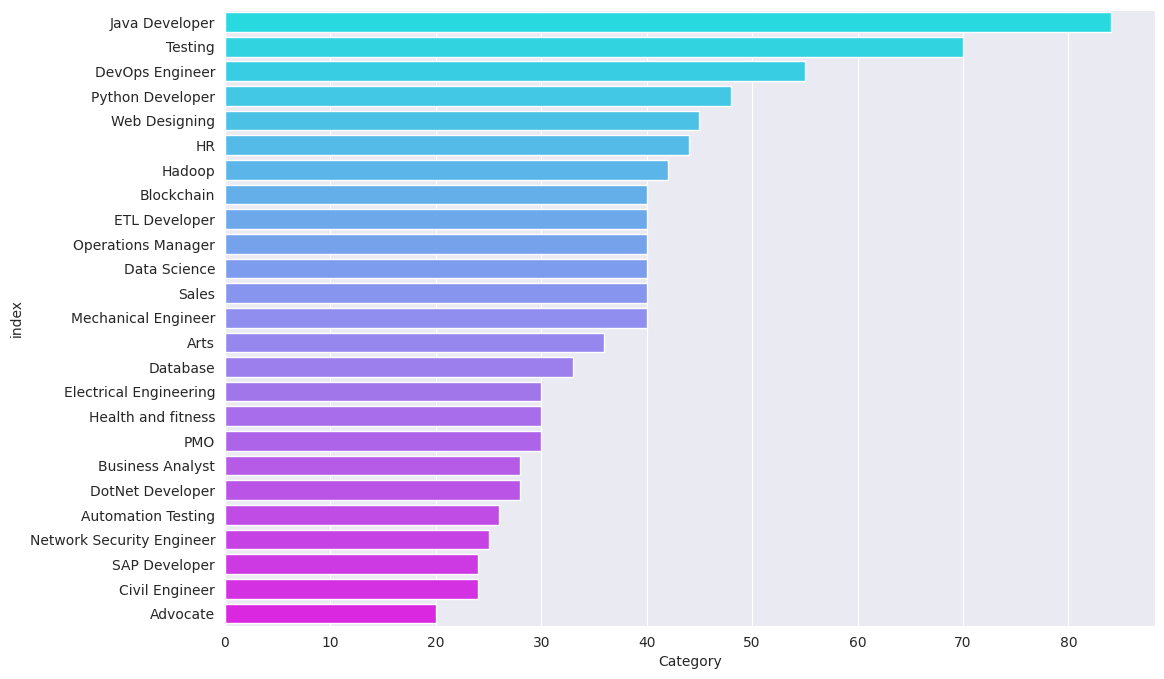

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'],y=category['index'],palette='cool')
plt.show()

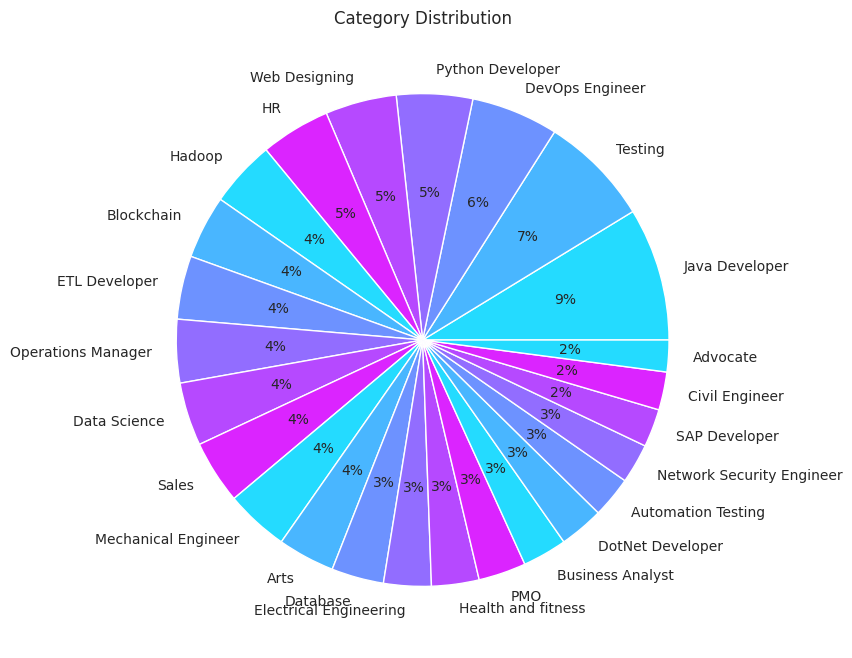

In [10]:
plt.figure(figsize=(12,8))
plt.pie(category['Category'],labels=category['index'],
        colors=sns.color_palette('cool'),autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()


2.Data Preprocessing

    1.Data cleaning
    2.Data encoding



In [11]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [12]:
def cleanResume(resumeText):
  resumeText=re.sub('http\S+', '', resumeText) #remove URLs
  resumeText=re.sub('RT|cc',' ',resumeText)  #remove RT and cc
  resumeText=re.sub('[#@&][\S]+', '',resumeText)  #remove hash tags
  resumeText=re.sub('@\S',' ',resumeText)  #remove mentions
  resumeText=re.sub('[%s]'   % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '',resumeText) #remove punctuations
  resumeText=re.sub(r'[^\x00-\x7f]',r' ',resumeText)
  resumeText=re.sub('\s+',' ',resumeText)   #remove extra white spaces
  return resumeText

In [13]:
df['cleaned']=df['Resume'].apply(lambda x:cleanResume(x))
df.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                             cleaned  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 BE UITR...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...

In [14]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [15]:
df['cleaned'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the revie

In [16]:
#getting the entire resume text
corpus=" "
for i in range (0,len(df)):
  corpus=corpus+df["cleaned"][i]

In [17]:
print(corpus)

 Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the revie

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
tokenizer=nltk.tokenize.RegexpTokenizer('\w+')
# Tokenizing the text
tokens=tokenizer.tokenize(corpus)
len(tokens)

400730

In [20]:
# now we shall make eveything lowerecase for uniformity
# to hold the new lower case words
words=[]
# loop through the tokens and make them lower case
for word in tokens:
  words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [21]:
# Encoding the data

label=LabelEncoder()
df['new_Category']=label.fit_transform(df['Category'])
df.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                             cleaned  new_Category  
0  Skills Programming Languages Python pandas num...             6  
1  Education Details May 2013 to May 2017 BE UITR...             6  
2  Areas of Interest Deep Learning Control System...             6  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...             6  
4  Education Details MCA YMCAUST Faridabad Haryan...             6

(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

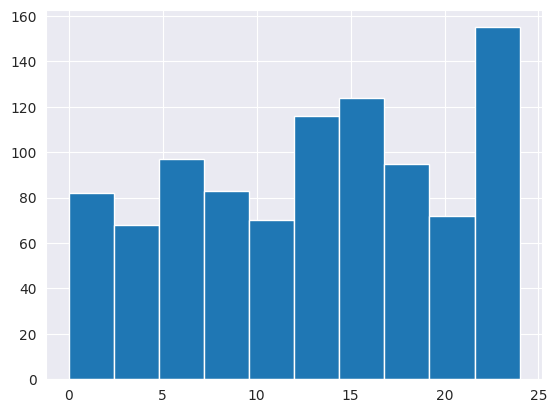

In [22]:
plt.hist(df['new_Category'])

In [23]:
# vectorizing the cleaned columns

text=df['cleaned'].values
target=df['new_Category'].values
word_vectorizer=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures=word_vectorizer.transform(text)



In [24]:
WordFeatures.shape

(962, 1500)

Train Test Data and modeling

In [25]:
#seperate train and test data
x_train,x_test,y_train,y_test=train_test_split(WordFeatures,target,random_state=24,test_size=0.2)


In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [27]:
#Model training
model=OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [28]:
#Prediction
y_pred=model.predict(x_test)

In [29]:
print(metrics.classification_report(y_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

To learn the top keywords to analyse

In [30]:
#stop words are generally the most common words in language
#English stop words from nltk
stopwords=nltk.corpus.stopwords.words('english')
words_new=[]
#now we need to remove the stopwords from the words variable
#Appending to words_new all words that are in words but not in stop words
for word in words:
  if word not in stopwords:
    words_new.append(word)

In [31]:
words_new[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [32]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [33]:
#Perform lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn=WordNetLemmatizer()
lem_words=[]
for word in words_new:
  word=wn.lemmatize(word)
  lem_words.append(word)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [34]:
lem_words[0:5]

['skill', 'programming', 'language', 'python', 'panda']

In [35]:
same=0
diff=0
for i in range(0,1832):
  if(lem_words[i]==words_new[i]):
    same=same+1
  elif(lem_words[i]!=words_new[i]):
    diff=diff+1
print('Numbe of words lemmatized=',diff)
print('number of words not lemmatized=',same)


Numbe of words lemmatized= 287
number of words not lemmatized= 1545


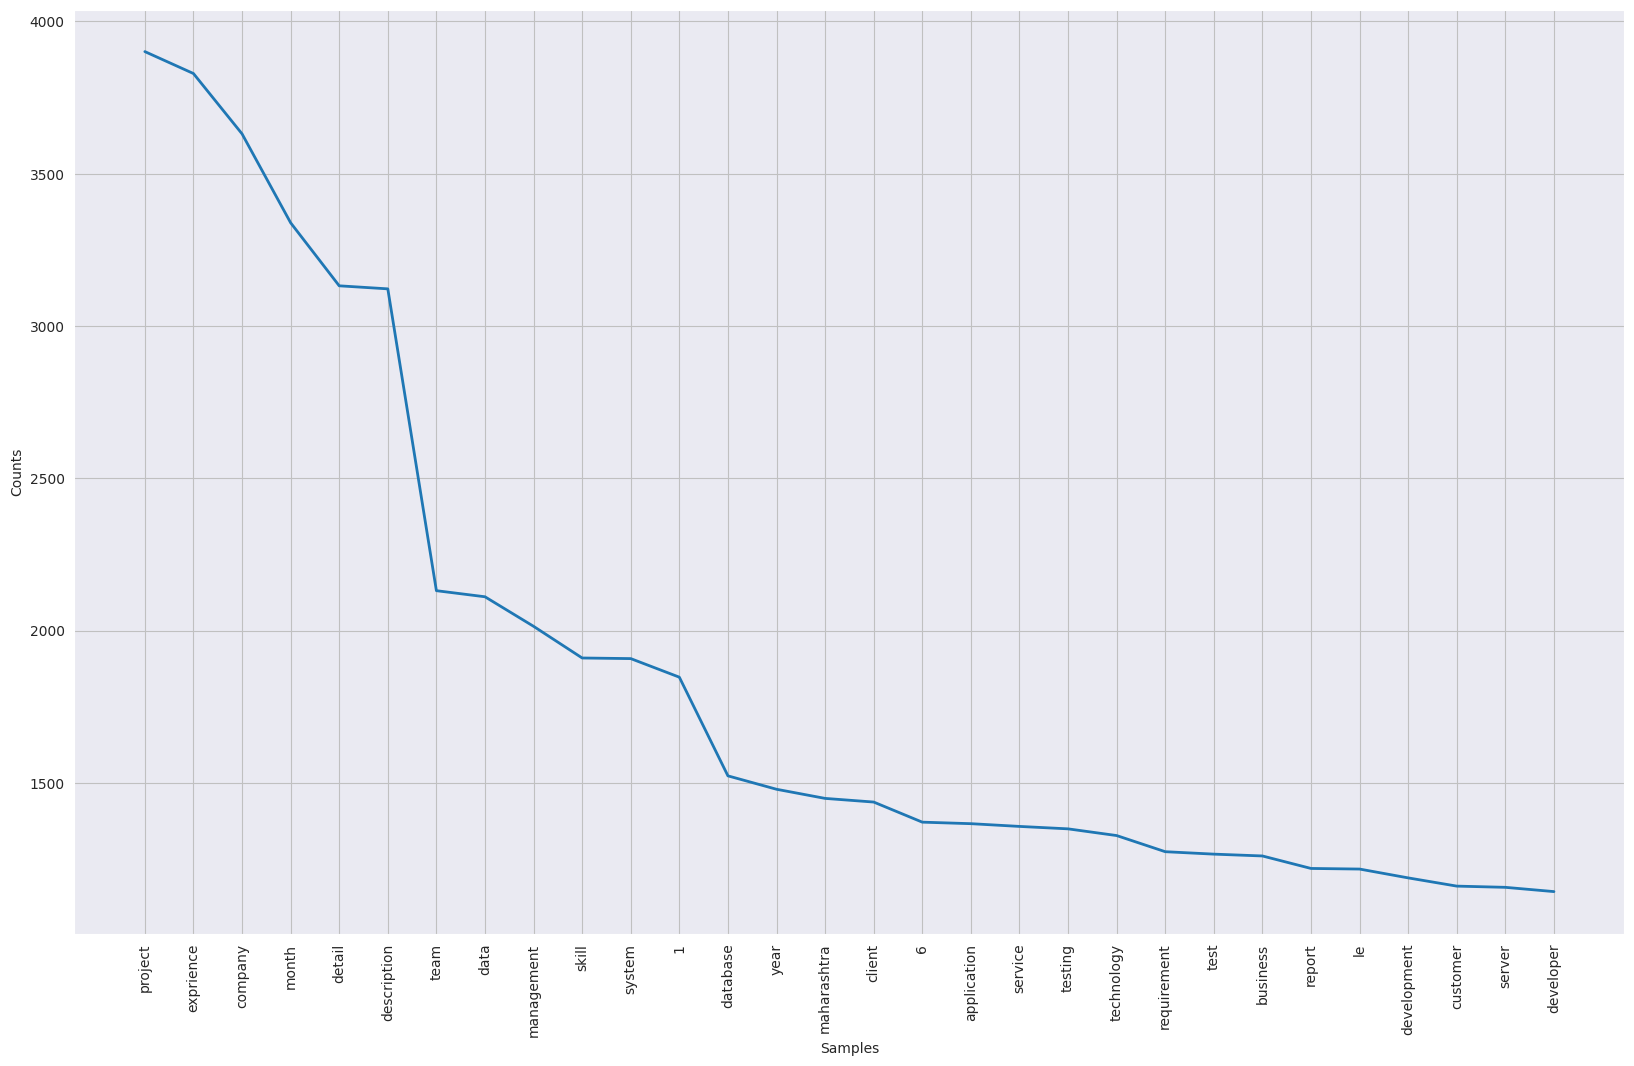

<Axes: xlabel='Samples', ylabel='Counts'>

In [36]:
#The frequency distribution of the words
freq_dist=nltk.FreqDist(lem_words)
#Freqcency distribution plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)


In [37]:
#Now we generate wordcloud
res=' '.join([i for i in lem_words if not i.isdigit()])


<function matplotlib.pyplot.show(close=None, block=None)>

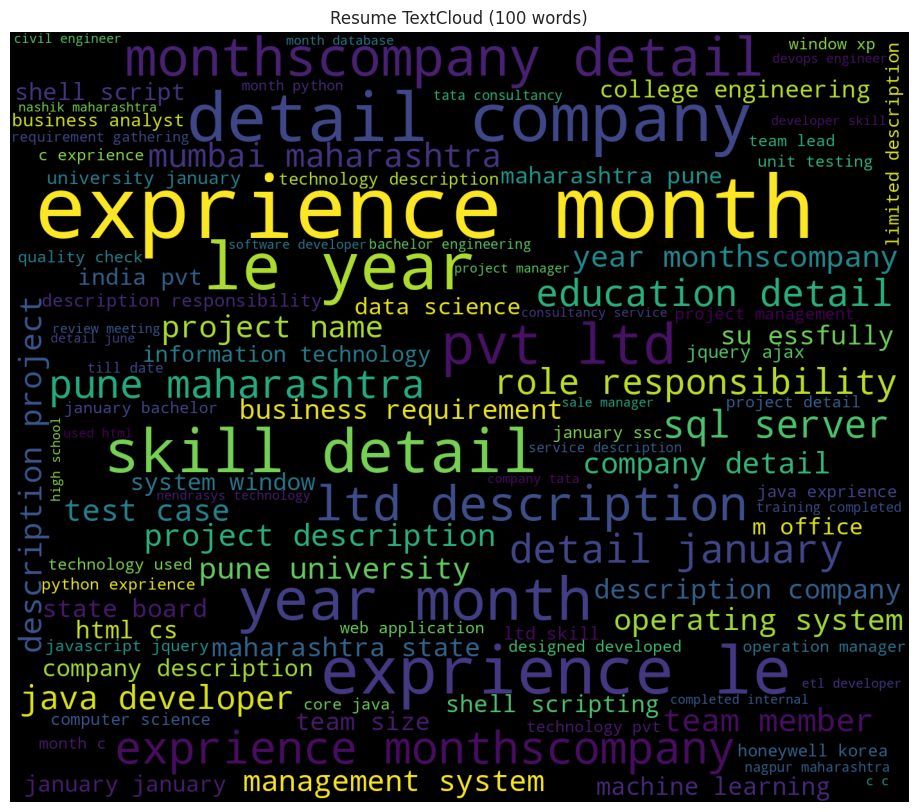

In [38]:
plt.subplots(figsize=(16,10))
wordcloud=WordCloud(
                      background_color='black',
                      max_words=100,
                      width=1400,
                      height=1200,
                     ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume TextCloud (100 words)')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

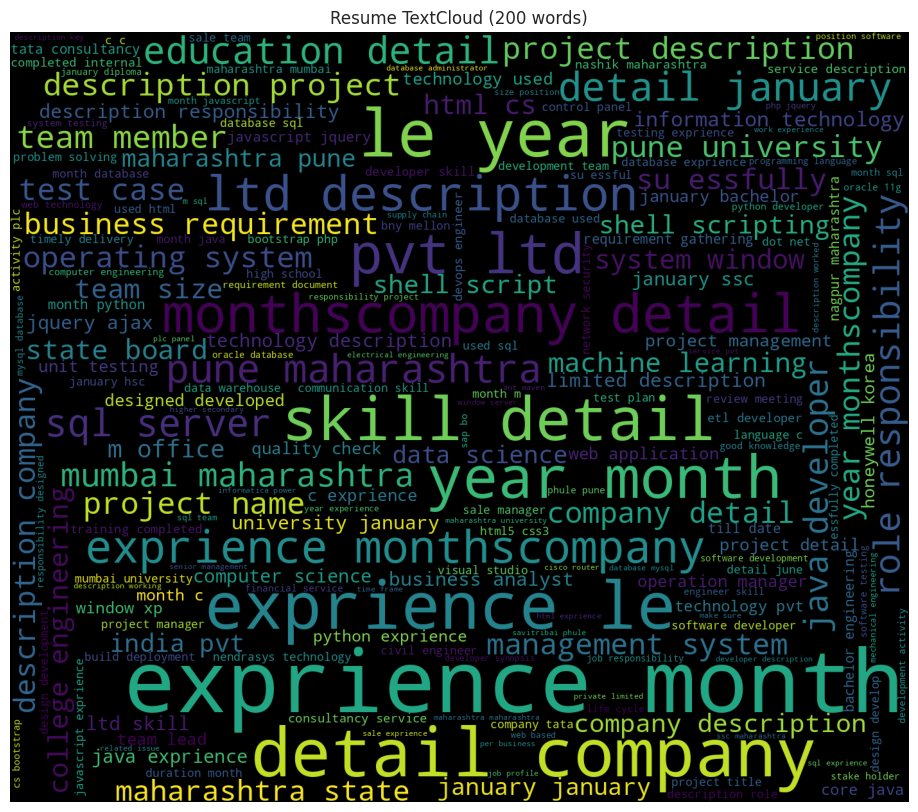

In [39]:
plt.subplots(figsize=(16,10))
wordcloud=WordCloud(
                      background_color='black',
                      max_words=200,
                      width=1400,
                      height=1200,
                     ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume TextCloud (200 words)')
plt.axis('off')
plt.show